# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [255]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

Calculating significance level alpha using the covariance matrix
$$
\hat{\alpha} = \frac{\hat{\sigma}_{Y}^2-\hat{\sigma}_{XY}}{\hat{\sigma}_{X}^2+\hat{\sigma}_{Y}^2-2\hat{\sigma}_{XY}}
$$

In [256]:
def alpha_func(D, idx):
   
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False)    
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [257]:
alpha_func(df, range(150))

0.7580390244311441

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [258]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(150,
                      150,
                      replace=True))

0.8116994146413992

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  



If we calculate the mean of sepal length, it only gives us a single estimate of the mean value of sepal length. It does not take into account the variability of the length and uncertainity of the data. Different samples of the data i.e., different combinations of the different types of Iris flower, would give a different mean. By using multiple bootstrap samples and calculating mean of these samples, you can take into account the variability of the data and uncertaininty of the data. It can provide range of possible values of the mean length which can be helpful in allocating space for the shipment.


_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [259]:
bootstrap_values = []
def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [260]:
alpha_SE = boot_SE(D=df,
                   B=1000,
                   seed=0)
print(alpha_SE)

0.03180510076860767


The bootstrap estimate for ${\rm SE}(\hat{\alpha})$ is $0.0318$.

_(vi)_ What is the original mean value of `Sepal.Length`?

In [261]:
original_mean = df['Sepal.Length'].mean()
print('Mean value of original sample is', original_mean)

Mean value of original sample is 5.843333333333334




Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.


In [262]:
# This function reurns an array of bootstrap samples
def bootstrap_se_samples(D, B=1000, seed=0):   
    B = 1000
    bootstrap_samples = []    
    n = len(D)
    rng = np.random.default_rng(seed) 
    for i in range(B):
        bootstrap_sample = np.random.choice(np.array(D), size=n, replace=True)       
        bootstrap_samples.append(bootstrap_sample)    
    return bootstrap_samples


# Get the bootstrapping samples of Sepal Length
np.random.seed(0)
bootstrap_samples = bootstrap_se_samples(df['Sepal.Length'], B=1000, seed=0)

# calculate the means of samples and store in bootstrap_means array
bootstrap_means= np.array([np.mean(sample) for sample in bootstrap_samples])

# get the t_ranges
t_ranges = np.array([np.ptp(sample) for sample in bootstrap_samples])

print('Original sample Mean value', original_mean)
print(f"Bootstrap Mean: {np.mean(bootstrap_means)}")
print(f"Standard deviation of bootstrapped means:{np.std(bootstrap_means)}")


print('Original T-range of data:', np.ptp(df['Sepal.Length']))
# Getting the mean of the t-ranges of the bootstrap samples
print(f"Mean T-range of bootstrapped data: {np.mean(t_ranges.mean())}")


Original sample Mean value 5.843333333333334
Bootstrap Mean: 5.8446913333333335
Standard deviation of bootstrapped means:0.06632284550590392
Original T-range of data: 3.6000000000000005
Mean T-range of bootstrapped data: 3.4867000000000004


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [263]:
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5]) # Compute the 2.5% and 97.5% percentile
print(f"95% Confidence Interval: {conf_interval}")

95% Confidence Interval: [5.71665 5.972  ]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

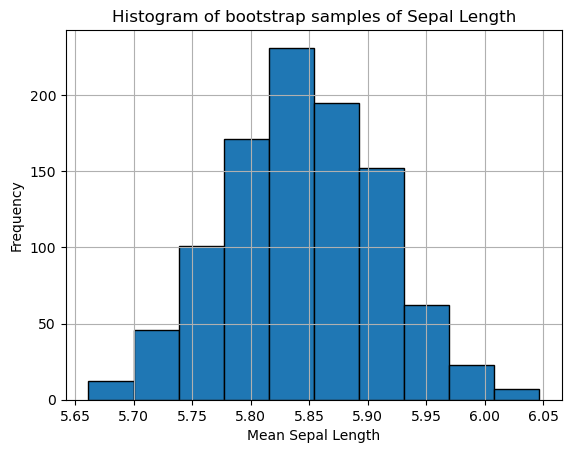

In [264]:

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
plt.hist(bootstrap_means, edgecolor='black')
plt.grid(True)

# Add a title
plt.title('Histogram of bootstrap samples of Sepal Length')

# Add a label to the x-axis
plt.xlabel('Mean Sepal Length')

# Add a label to the y-axis
plt.ylabel('Frequency')

# Show the plot
plt.show()

The histogram shows the distribution of means of the bootstrap samples of sepal length. It shows the spread and shows that it follows the classic bell curve (normal distribution). 

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

The bootstrap analysis shows that the mean of means from bootstrap samples of sepal length of Iris flowers is very close to mean of original dataset(5.845 vs 5.84). The standard deviation of bootstrap mean(0.066) indicates that although the mean estimate is close to original mean, there is some variability around estimate. The mean t-range (3.486) shows the variability or spread of sepal length values across the bootstrap samples. It shows an important piece of information for the shipping company to consider. I think the shipping company can use the original sample mean as an estimate for planning space allocation. But it is important to consider the variability shown by standard deviation and t-range to allow for fluctuations in the length.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
